In [17]:
%%html
<style type='text/css'>
.CodeMirror{
    font-size: 18px;
}

div.output_area pre {
    font-size: 16px;
}
</style>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from scipy import stats
np.set_printoptions(precision=3, suppress=True)

In [3]:
# Load dữ liệu: data-example/example_sales_vn.csv
file_path = "data/supermarket_sales_vn.csv"
df = pd.read_csv(file_path, usecols=['Gender','Total'])

In [4]:
mean = np.mean(df['Total'])
median = np.median(df['Total'])
print(mean)
print(median)

322.96674900000005
253.848


## Khuynh hướng tập trung

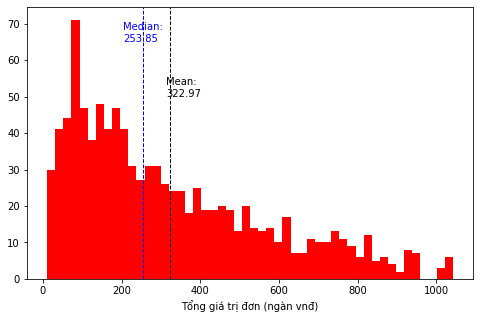

In [5]:
fig, ax = plt.subplots(figsize=(8,5), num=1)
ax.hist(df['Total'], bins=50, color='red')
ax.set_xlabel("Tổng giá trị đơn (ngàn vnđ)")

ax.axvline(mean, color='k', linestyle='dashed', linewidth=1)
ax.text(mean-10, 50, f"Mean:\n{mean:.2f}", color="k")
#ax.text(mean, 60, 'Mean: %f'%(mean))

ax.axvline(median, color='b', linestyle='dashed', linewidth=1)
ax.text(median-50, 65, f"Median:\n{median:.2f}", color="b")

plt.show()

## 1. Thử chọn random một số dữ liệu

In [6]:
n = np.random.randint(50,100)
sample = np.random.choice(df['Total'], n)
print(n, np.mean(sample))

74 351.25011486486494


## 2. Chọn nhiều mẫu random và tính mean của mỗi mẫu

In [7]:
s_means = []
for i in range(1000):
    n = np.random.randint(50,100)
    sample = np.random.choice(df['Total'], n)
    s_means.append(np.mean(sample))

# Convert sang Numpy array
s_means = np.array(s_means)
print(s_means.mean(), s_means.std())
print(s_means.min(), s_means.max())

323.7553859197749 29.43329491977581
237.8058046875 413.4396940298508


## 3. Vẽ biểu đồ phân bố 

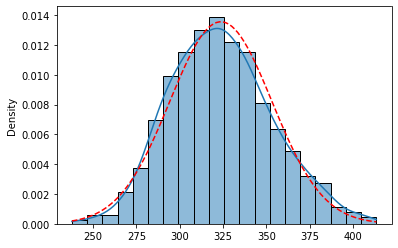

In [8]:
x_pdf = np.linspace(s_means.min(), s_means.max(), 100)
y_pdf = stats.norm.pdf(x_pdf, s_means.mean(), s_means.std())

ax = sns.histplot(s_means, bins=20, kde=True, stat='density')
ax.plot(x_pdf, y_pdf, color='r', linestyle='--')

plt.show()

# 4. Thử nghiệm Z-Test

Giả sử dữ liệu trên là của năm 2021 (mean khoảng 322k). Đầu năm 2022, người quản lý lấy ra danh sách 100 đơn hàng và tính mean, kết quả là 283k. Người này lo lắng doanh thu sẽ sụt giảm. Vậy tình trạng đó có đáng lo không?

- h0: new_mean >= 283 # Dữ liệu năm 2022 vẫn có khả năng cao là nằm trong phân bố cũ 
- h1: new_mean < 283 # Dữ liệu đầu năm 2022 có khả năng nằm trong một phân bố khác
- test_statistic: 283

In [9]:
test_statistic = 283
n = 1

In [10]:
cv5 = np.percentile(s_means, 5)
print(cv5)

280.0767324423338


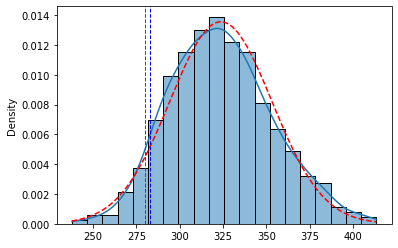

In [11]:
ax = sns.histplot(s_means, bins=20, kde=True, stat='density')
ax.plot(x_pdf, y_pdf, color='r', linestyle='--')

ax.axvline(test_statistic, color='b', linestyle='dashed', linewidth=1)
ax.axvline(cv5, color='g', linestyle='dashed', linewidth=1)

plt.show()

### 4.1. Thực hiện left-tailed Z-Test (cách 1)

In [12]:
p_value1 = np.count_nonzero(s_means <= test_statistic)/s_means.size
print(p_value1)

0.07


==> p-Value lớn hơn 0.05. Nghĩa là vẫn chưa bác bỏ H0. Kết quả trên vẫn có khả năng nằm trong phân bố giống với 2021

==> Tình trạng chưa đáng lo

### 4.2. Thực hiện left-tailed Z-Test (cách 2)

In [13]:
# Tính theo Z-Score
z_score = (test_statistic - s_means.mean())/(s_means.std()/np.sqrt(n))
print(z_score)

-1.3846695054311409


==> Tra bảng Z-Table được kết quả: xác suất = 0.0838

==> p-Value = 0.0838, vẫn lớn hơn 0.05

### 4.3. Thực hiện left-tailed Z-Test (cách 3)

**Sử dụng hàm `cdf()` để tính tổng xác suất các dữ liệu nhỏ hơn h1**

Tham khảo: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [14]:
import scipy
import scipy.stats

In [15]:
# Dựa trên z-score (thì chỉ cần đo trên phân bố chuẩn tắc)
stats.norm.cdf(z_score)

0.08307677383150092

In [16]:
# Không dựa vào z-score (thì cần đo trên phân bố chuẩn với mean và std)
stats.norm.cdf(test_statistic, loc=s_means.mean(), scale=s_means.std())

0.08307677383150092